# Capítulo 5 - Estatística

In [1]:
import matplotlib.pyplot as plt
import math
from collections import Counter
from typing import List

## Descrevendo um conjunto de dados

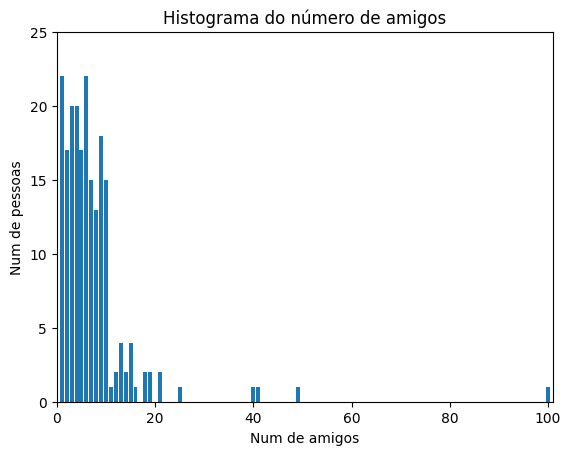

In [2]:
num_amigos = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

contagem_amigos = Counter(num_amigos)
xs = range(101)
ys = [contagem_amigos[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histograma do número de amigos")
plt.xlabel("Num de amigos")
plt.ylabel("Num de pessoas")
plt.show()

In [3]:
num_pontos = len(num_amigos)
maior_valor = max(num_amigos)
menor_valor = min(num_amigos)
print(f"{num_pontos}\n{maior_valor}\n{menor_valor}")

204
100.0
1


## Medidas de tendência central

In [4]:
def media(xs: List[float]) -> float:
    return sum(xs) / len(xs)

media(num_amigos)

7.333333333333333

In [5]:
def _mediana_impar(xs: List[float]) -> float:
    return sorted(xs)[len(xs) // 2]

def _mediana_par(xs: List[float]) -> float:
    sorted_xs = sorted(xs)
    ponto_medio = len(xs) // 2
    return (sorted_xs[ponto_medio - 1] + sorted_xs[ponto_medio]) / 2

def mediana(v: List[float]) -> float:
    return _mediana_par(v) if len(v) % 2 == 0 else _mediana_impar(v)

print(mediana([1, 10, 2, 9, 5]) == 5)
print(mediana([1, 9, 2, 10]) == ((2 + 9) / 2))
print(mediana((num_amigos)))

True
True
6.0


In [6]:
def quantil(xs: List[float], p: float) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

print(quantil(num_amigos, 0.1) == 1)
print(quantil(num_amigos, 0.25) == 3)
print(quantil(num_amigos, 0.75) == 9)
print(quantil(num_amigos, 0.90) == 13)

True
True
True
True


In [7]:
def moda(x: List[float]) -> float:
    contagem = Counter(x)
    contagem_maxima = max(contagem.values())
    return [x_i for x_i, contagem in contagem.items() if contagem == contagem_maxima]

set(moda(num_amigos))

{1, 6}

## Dispersão

In [8]:
def dispersao(xs: List[float]) -> float:
    return max(xs) - min(xs)

dispersao(num_amigos)

99.0

In [9]:
# Importado do capítulo de algebra linear

Vector = List[float]

def dot(v: Vector, w: Vector) -> float:
    assert len(v) == len(w), "Vetores devem ter o mesmo tamanho"
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    return dot(v, v)

def de_media(xs: List[float]) -> float:
    x_bar = media(xs)
    return [x - x_bar for x in xs]

def variancia(xs: List[float]) -> float:
    assert len(xs) >= 2, "Variância requer ao menos dois elementos"
    n = len(xs)
    desvio = de_media(xs)
    return sum_of_squares(desvio) / (n - 1)

print(81.54 < variancia(num_amigos) < 81.55)

True


In [10]:
def desvio_padrao(xs: List[float]) -> float:
    return math.sqrt(variancia(xs))

9.02 < desvio_padrao(num_amigos) < 9.04

True

In [11]:
def variancia_interquartil(xs: List[float]) -> float:
    return quantil(xs, 0.75) - quantil(xs, 0.25)

variancia_interquartil(num_amigos) == 6

True

## Correlação

In [ ]:
def covariancia(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs e ys devem ter o mesmo número de elementos"
    return dot(de_media(xs), de_media(ys)) / (len(xs) - 1)

In [12]:
def correlacao(xs: List[float], ys: List[float]) -> float:
    desvio_x = desvio_padrao(xs)
    desvio_y = desvio_padrao(ys)
    if desvio_x > 0 and desvio_y > 0:
        return covariancia(xs, ys) / desvio_x / desvio_y
    else:
        return 0